# 1. Cargar los datos y bibliotecas necesarias
El primer paso es cargar las bibliotecas necesarias y los datos en el entorno de Jupyter Notebook.

In [1]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

# Cargar los datos desde el archivo Excel
data = pd.read_excel('datos_naive_bayes.xlsx')

# Ver las primeras filas de los datos
data.head()

,S1,S2,S3,ST1,V2
0,12,11,11,34,Logro destacado
1,4,5,5,14,En proceso
2,12,12,12,36,Logro destacado
3,7,8,8,23,Logro previsto
4,12,11,10,33,Logro previsto


# 2. Exploración de los datos
Antes de proceder, es importante explorar brevemente los datos para entender su estructura. También puedes visualizar la distribución de la variable objetivo (V2).

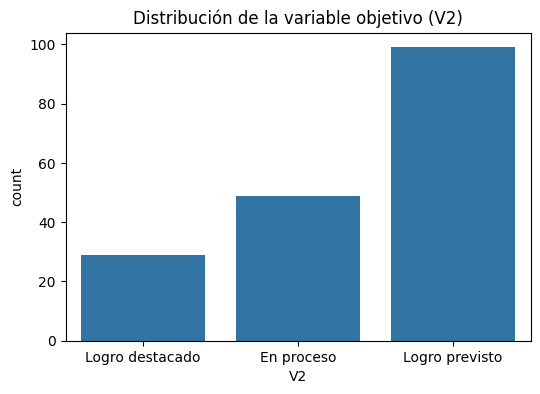

In [2]:
# Distribución de la variable objetivo (V2)
plt.figure(figsize=(6,4))
sns.countplot(x='V2', data=data)
plt.title('Distribución de la variable objetivo (V2)')
plt.show()

En este gráfico podemos ver cuántas observaciones hay para cada categoría de la variable objetivo.

# 3. Preprocesamiento de los datos
En este paso, debemos transformar la variable categórica V2 en valores numéricos y dividir los datos en conjuntos de entrenamiento y prueba.

In [3]:
# Convertir la variable categórica V2 a numérica
data['V2'] = data['V2'].map({'Logro destacado': 2, 'Logro previsto': 1, 'En proceso': 0})

# Definir las variables predictoras (X) y la variable objetivo (y)
X = data[['S1', 'S2', 'S3', 'ST1']]
y = data['V2']

# Dividir los datos en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ver las dimensiones de los conjuntos de entrenamiento y prueba
print(f"Conjunto de entrenamiento: {X_train.shape}")
print(f"Conjunto de prueba: {X_test.shape}")

Conjunto de entrenamiento: (141, 4)
Conjunto de prueba: (36, 4)


# 4. Entrenamiento del modelo Naive Bayes
A continuación, entrenamos el modelo Naive Bayes utilizando los datos de entrenamiento.

In [6]:
# Crear el modelo Naive Bayes
model = GaussianNB()

# Entrenar el modelo
model.fit(X_train, y_train)

GaussianNB()

### Realizar predicciones en el conjunto de prueba

In [7]:
y_pred = model.predict(X_test)

# 5. Evaluación del modelo
Después del entrenamiento, evaluamos el rendimiento del modelo utilizando la matriz de confusión y el informe de clasificación.

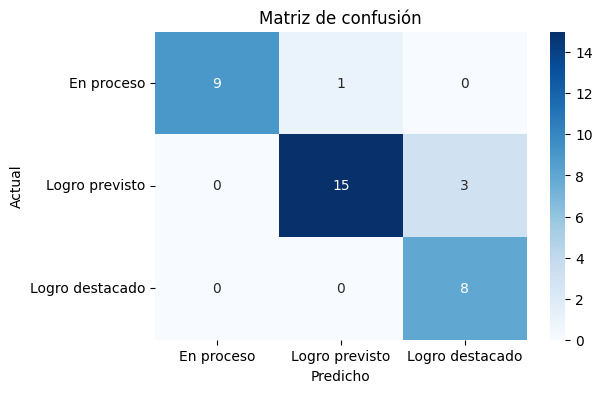

                 precision    recall  f1-score   support

     En proceso       1.00      0.90      0.95        10
 Logro previsto       0.94      0.83      0.88        18
Logro destacado       0.73      1.00      0.84         8

       accuracy                           0.89        36
      macro avg       0.89      0.91      0.89        36
   weighted avg       0.91      0.89      0.89        36



In [8]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['En proceso', 'Logro previsto', 'Logro destacado'], yticklabels=['En proceso', 'Logro previsto', 'Logro destacado'])
plt.title('Matriz de confusión')
plt.ylabel('Actual')
plt.xlabel('Predicho')
plt.show()

# Informe de clasificación
print(classification_report(y_test, y_pred, target_names=['En proceso', 'Logro previsto', 'Logro destacado']))

### Matriz de confusión:

**Clase "En proceso":**
- El modelo predijo correctamente 9 de los 10 casos de la clase "En proceso".
- 1 caso fue incorrectamente clasificado como "Logro previsto".

**Clase "Logro previsto":**
- El modelo predijo correctamente 15 de los 18 casos de la clase "Logro previsto".
- 3 casos fueron incorrectamente clasificados como "Logro destacado".

**Clase "Logro destacado":**
- El modelo predijo correctamente los 8 casos de "Logro destacado" y no hubo ninguna clasificación errónea hacia otras clases.

### Informe de clasificación:

**Precisión**: Es el número de verdaderos positivos sobre el número de predicciones positivas.
- La clase "En proceso" tiene una precisión perfecta de 1.00.
- La clase "Logro previsto" tiene una precisión de 0.94, lo que significa que el 94% de las predicciones para esta clase fueron correctas.
- La clase "Logro destacado" tiene una precisión más baja (0.73), lo que indica que el modelo cometió algunos errores al predecir esta clase.

**Recall**: Es el número de verdaderos positivos sobre el total de positivos reales.
- El "Logro destacado" tiene un recall perfecto de 1.00, lo que indica que el modelo identificó todos los casos reales de esta clase.
- "En proceso" tiene un recall de 0.90, lo que significa que el 90% de los casos reales de esta clase fueron identificados correctamente.
- El "Logro previsto" tiene un recall de 0.83.

**F1-Score**: Es una medida combinada de precisión y recall. Si ambos son altos, el F1-Score será alto.
- La clase "En proceso" tiene el F1-Score más alto (0.95).
- Las otras dos clases tienen F1-Scores menores, siendo "Logro destacado" el más bajo con 0.84.

### Accuracy (precisión global): El modelo tiene una precisión general de 0.89, lo que indica que el 89% de las predicciones fueron correctas.

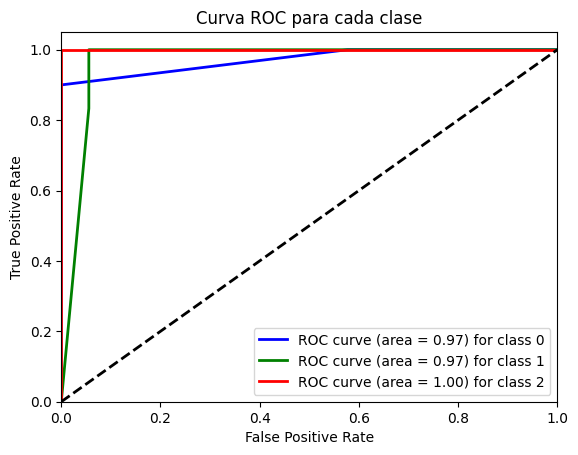

In [9]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

# Binarizamos las clases para la curva ROC
y_bin = label_binarize(y, classes=[0, 1, 2])  # 0: En proceso, 1: Logro previsto, 2: Logro destacado
n_classes = y_bin.shape[1]

# Separar los datos de nuevo si no los tienes a mano
X_train, X_test, y_train_bin, y_test_bin = train_test_split(X, y_bin, test_size=0.2, random_state=42)

# Entrenamos el modelo
model = OneVsRestClassifier(GaussianNB())
model.fit(X_train, y_train_bin)

# Predecir probabilidades
y_score = model.predict_proba(X_test)

# Calcular la curva ROC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar la curva ROC
plt.figure()
colors = ['blue', 'green', 'red']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para cada clase')
plt.legend(loc="lower right")
plt.show()


**Curva ROC para la clase 0 ("En proceso"):**
El área bajo la curva (AUC) es 0.97, lo que indica que el modelo tiene un excelente rendimiento al clasificar correctamente la clase "En proceso". Una AUC cercana a 1.0 significa que el modelo está discriminando correctamente entre positivos y negativos en la mayoría de los casos.

**Curva ROC para la clase 1 ("Logro previsto"):**
También tiene un AUC de 0.97, lo que muestra un rendimiento similar al de la clase 0. Esto significa que el modelo es igualmente eficaz en la predicción de la clase "Logro previsto" en comparación con "En proceso".

**Curva ROC para la clase 2 ("Logro destacado"):**
El AUC para esta clase es 1.00, lo que significa que el modelo está clasificando perfectamente los casos de "Logro destacado". Es un resultado ideal, ya que no hay errores en la clasificación de esta clase. El modelo tiene una sensibilidad perfecta (100% de los verdaderos positivos fueron clasificados correctamente).